# VOLUNTARIO LENNARD JONNES
## Teresa Puyol López



La simulación está programada en C (se irá haciendo referencia a los diferentes programas a lo largo del informe), y las animaciones están realizadas en Python, recogidas en este archivo de Jupyter Notebook.  

Se realizarán comparativas entre mi portátil personal y el acceso a Joel. Para no repetir las características del ordenador contínuamente a lo largo de la práctica, se hará referencia a mi portatil personal como **RYZEN**, y el procesador es un AMD Ryzen 7 7730U, 8 cores y 16 threads.

Hechas las especificaciones, comenzamos con la realización de la práctica:

### APARTADO 1

Simulamos 20 átomos del gas en una caja de 10 x 10, con posiciones iniciales aleatorias y velocidades de dirección aleatoria pero módulo 1.

El paso para la simulación es de $\Delta$ t = 0.02, y el tiempo de simulación es de 100.

Los archivos utilizados en este apartado se encuentran el la carpeta 'apartado_1'. El programa para la simulación  es 'apartado_1.c', y nos genera 4 archivos: 
- 'datos_simulacion.txt' donde se guardan el número de partículas, la longitud de la caja, el paso, la temperatura del sistema y el tiempo de simulación, en ese orden.
- 'posiciones.txt' que contiene las posiciones de cada partícula tras cada paso.
- 'energía.txt' que almacena los valores de energía potencial, cinética y total.
- 'velocidades.txt' que almacena las velocidades de cada partícula para realizar el histograma.







Primero realizamos la animación para la evolución de las partículas:

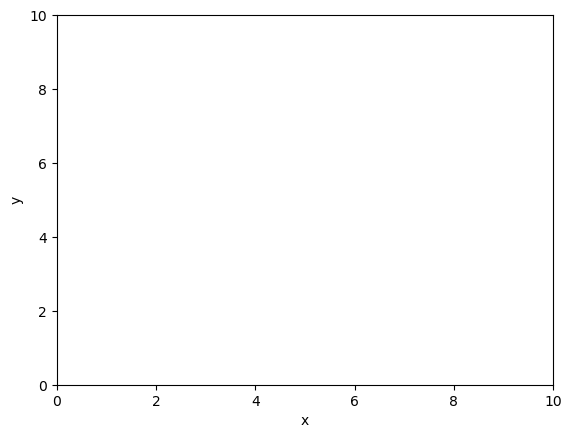

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/datos_simulacion.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/posiciones.txt"   # nombre de tu fichero              
interval_ms = 10                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,


# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,




# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=False)



# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')

A continuación, haremos una gráfica donde estarán representadas la energía cinética, potencial y total:

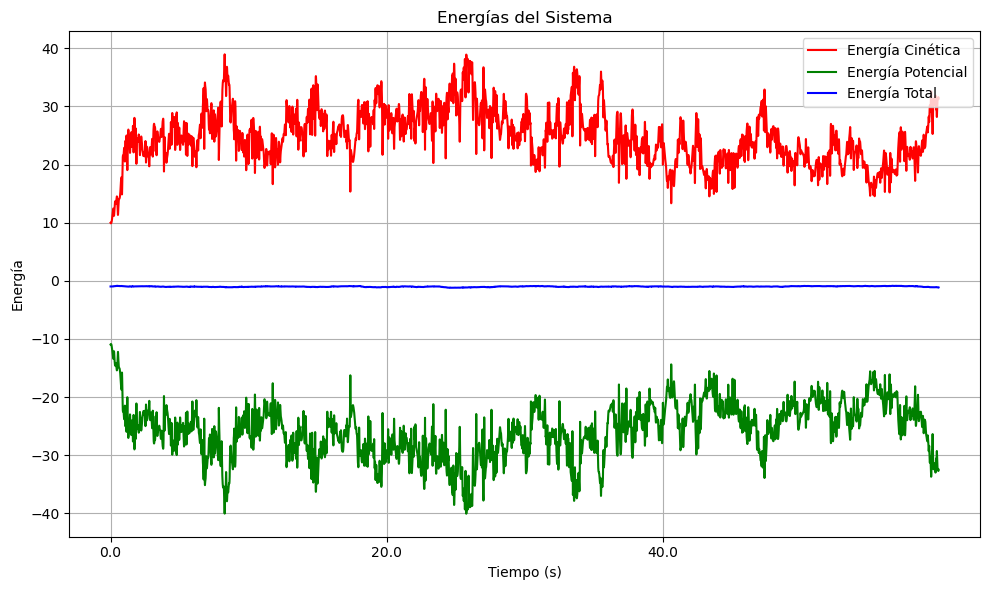

In [19]:
# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 20/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,20))
plt.title('Energías del Sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()

Podemos ver como la energía total se conserva, pero tiene como dos escalones alrededor de los segundos 10 y 80, esto puede deberse a errores de cálculo en la simulación.

A continuación, hacemos un histograma con las velocidades, y comprobamos si sigue la distribución de Maxwell, definida por la ecuación:

$P(V)\;=\;\left( \frac{m}{k_b T}\right) v e^{-\frac{m v^2}{2k_B T}}$

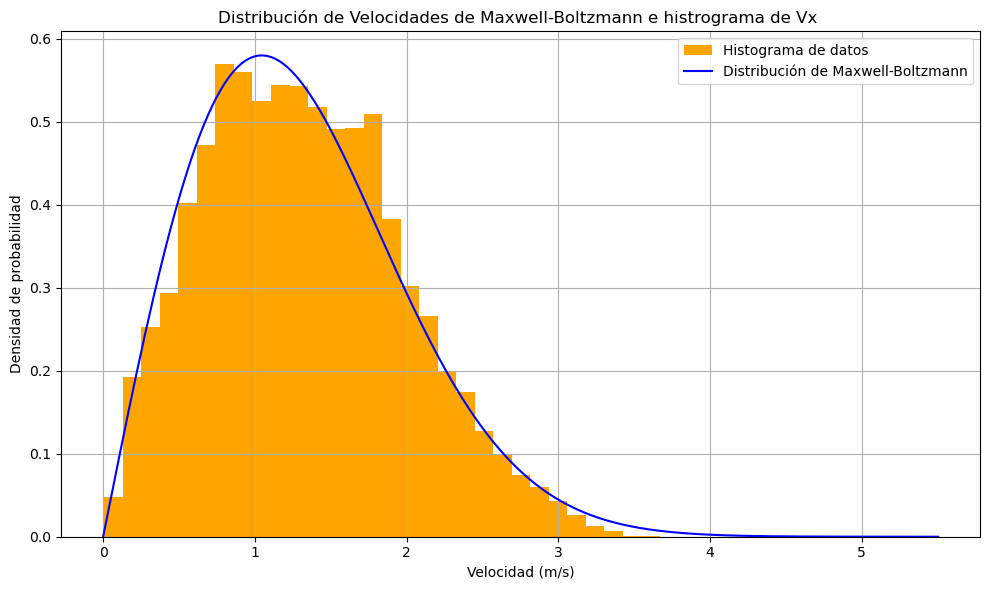

In [21]:


# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/velocidades.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title('Distribución de Velocidades de Maxwell-Boltzmann e histrograma de Vx ')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()


Parece que si sigue la distribución de Maxwell

### APARTADO 2
Estudiamos lo que ocurre cuando el módulo de la velocidad inicial toma valores de 2, 3 y 4.

También estudiamos que ocurre si le damos como velocidad inicial solo $v_x$ generada aleatoriamente entre 0 y 1, y $v_y = 0$



Comenzamos simulando el sistema para valores del módulo de la velocidad inicial igual a 2, 3 y 4.

Haremos una modificación del programa 1 en la carpeta 'apartado_2', donde modificaremos el programa para que los ficheros que se guarden se cambien de nombre e iremos cambiando el valor de la velocidad inicial $v_0$. El programa se llama 'apartado_2'.

Para cada velocidad mostraremos las gráficas de las energías y el histograma de la velocidad.

Para $v_0$ = 2:


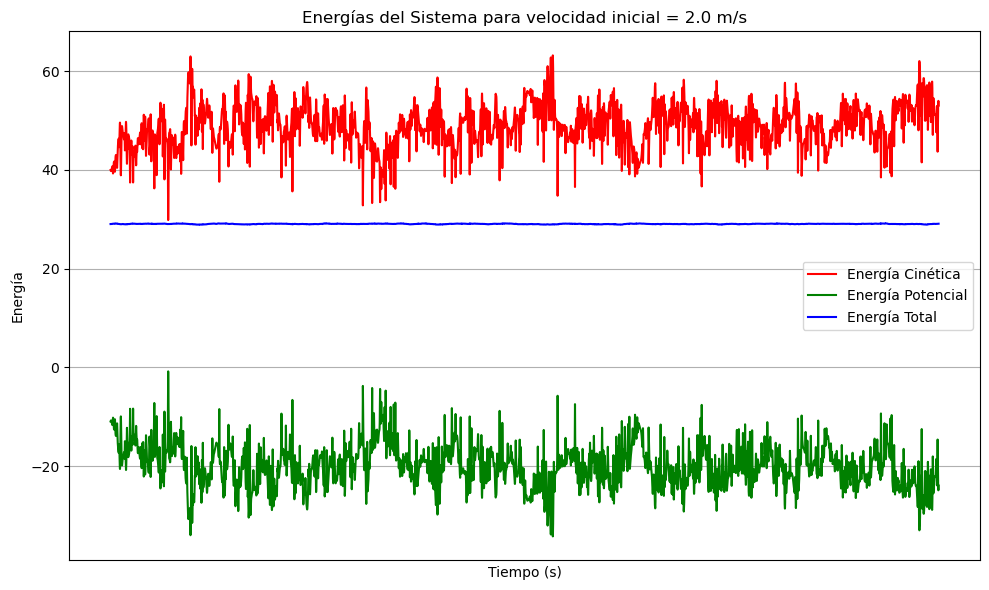

In [24]:
variable =2.0

data = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/datos_simulacion_v{variable}.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/energia_v{variable}.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 30/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,30))
plt.title(f'Energías del Sistema para velocidad inicial = {variable} m/s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


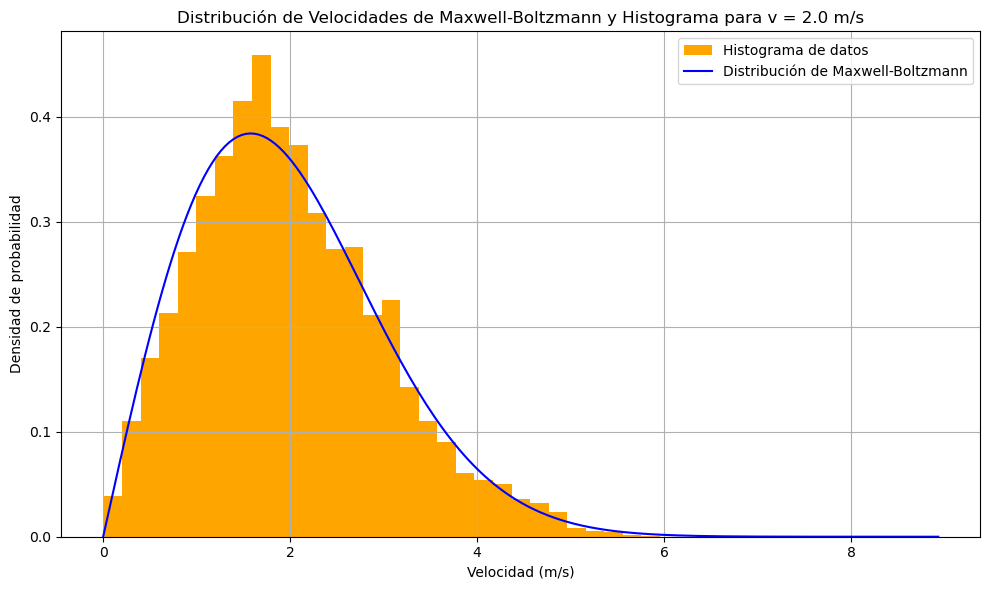

In [ ]:
# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = f"c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/velocidades_v{variable}.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title(f'Distribución de Velocidades de Maxwell-Boltzmann y Histograma para v = {variable} m/s')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()


Para $v_0$ = 3:


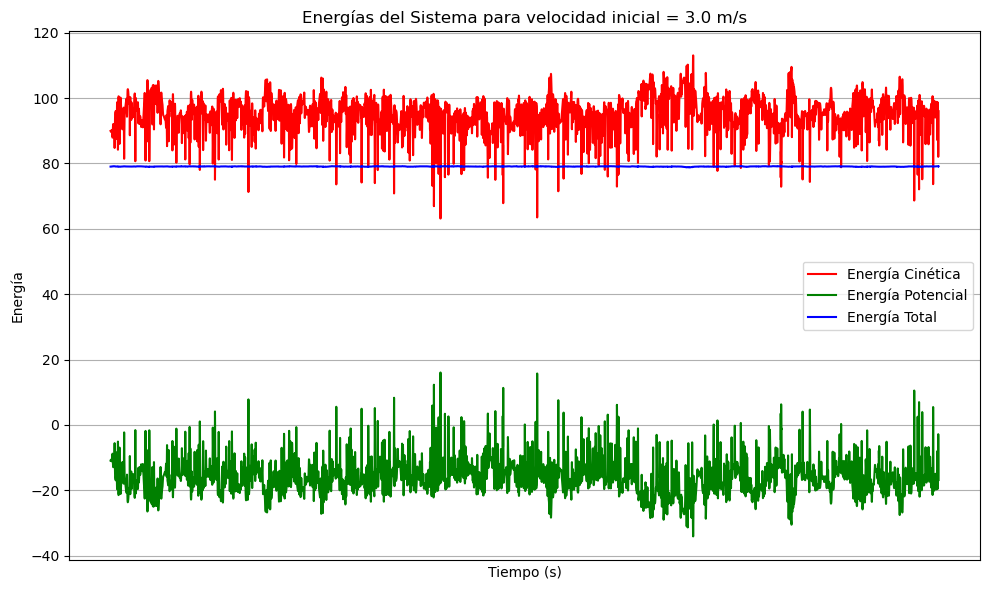

In [28]:
variable =3.0

data = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/datos_simulacion_v{variable}.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/energia_v{variable}.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 30/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,30))
plt.title(f'Energías del Sistema para velocidad inicial = {variable} m/s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


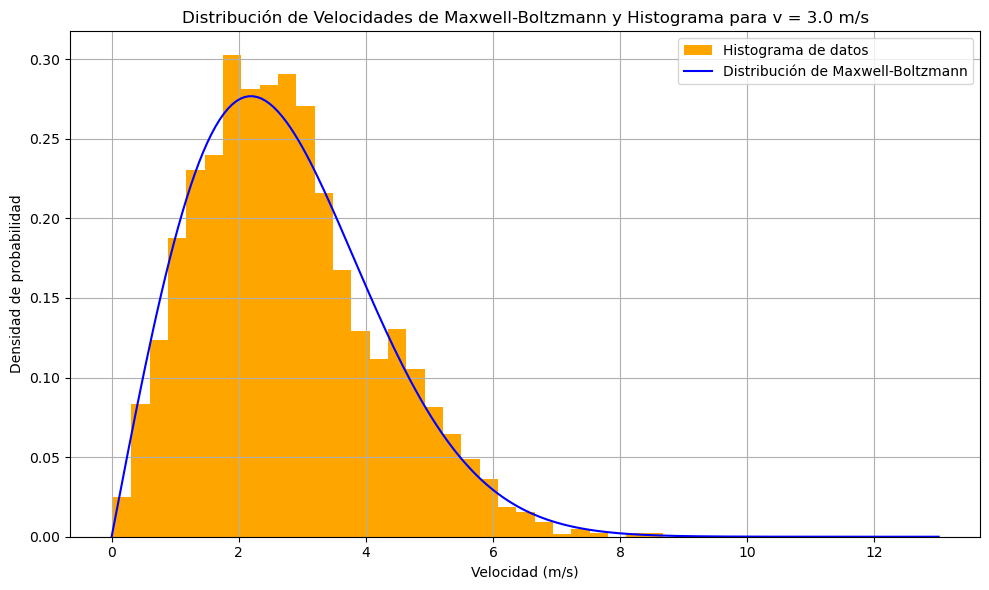

In [29]:
# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = f"c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/velocidades_v{variable}.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title(f'Distribución de Velocidades de Maxwell-Boltzmann y Histograma para v = {variable} m/s')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()

Para $v_0$ = 4:


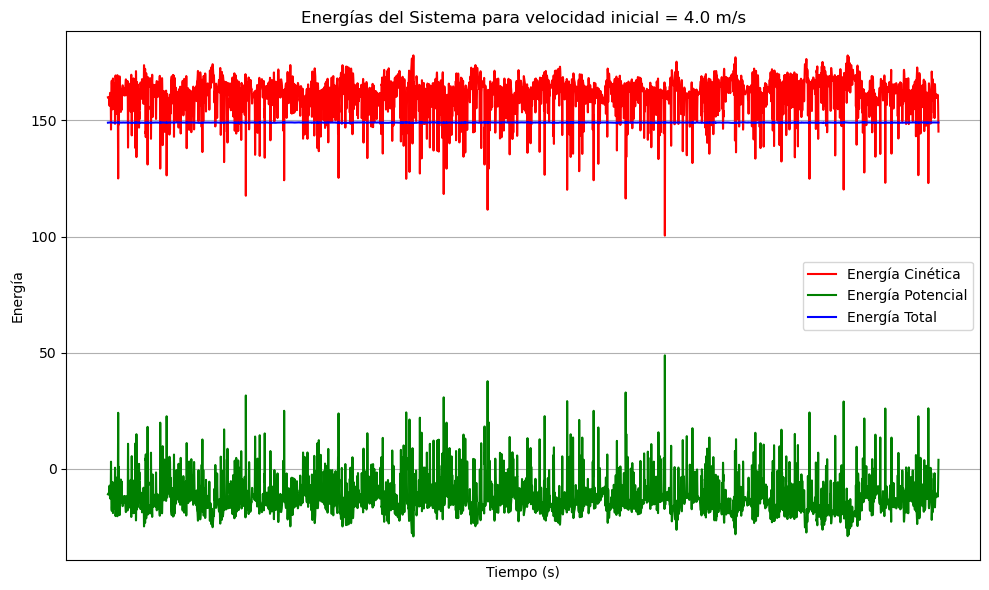

In [17]:
variable =4.0

data = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/datos_simulacion_v{variable}.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/energia_v{variable}.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 30/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,30))
plt.title(f'Energías del Sistema para velocidad inicial = {variable} m/s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


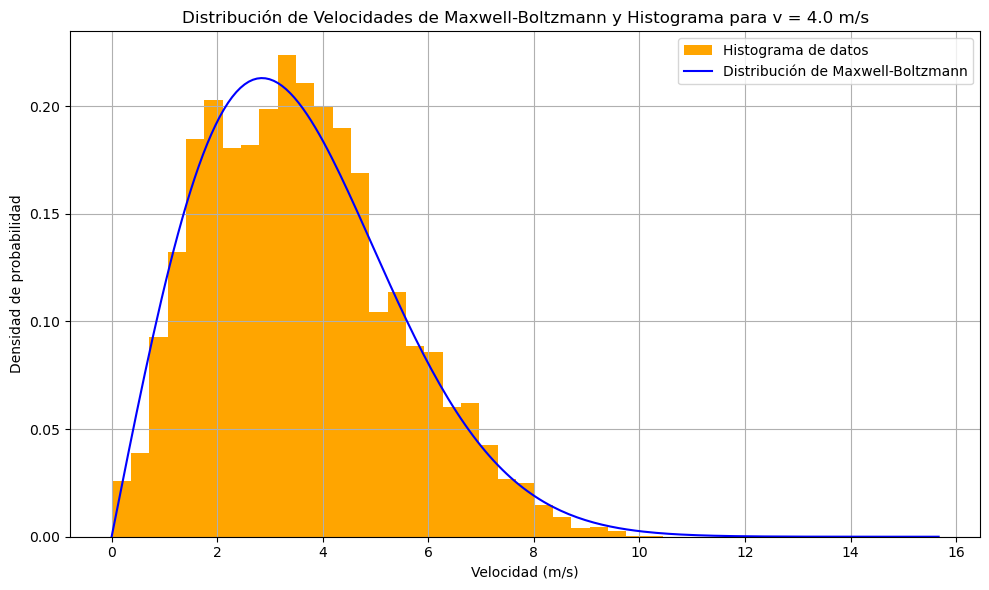

In [19]:
# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = f"c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/velocidades_v{variable}.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title(f'Distribución de Velocidades de Maxwell-Boltzmann y Histograma para v = {variable} m/s')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()

Ahora simulamos el segundo caso, donde generamos $v_x$ de forma aleatoria y $v_y = 0$. Para eso, modificaremos el programa del apartado 1 para cambiar las velocidades. 

El resto de especificaciones son idénticas, salvo por el cambio en la función de velocidad inicial. El programa se llama 'apartado_2_randomizado' y se encuentra en la carpeta 'apartado_2'.

El código mostrando la simulación es el siguiente:


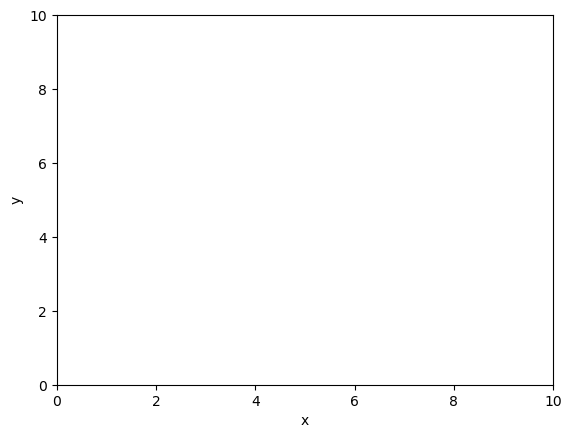

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/datos_simulacion.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/posiciones.txt"   # nombre de tu fichero              
interval_ms = 10                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,


# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,




# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=False)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')


Las energías son las siguientes:


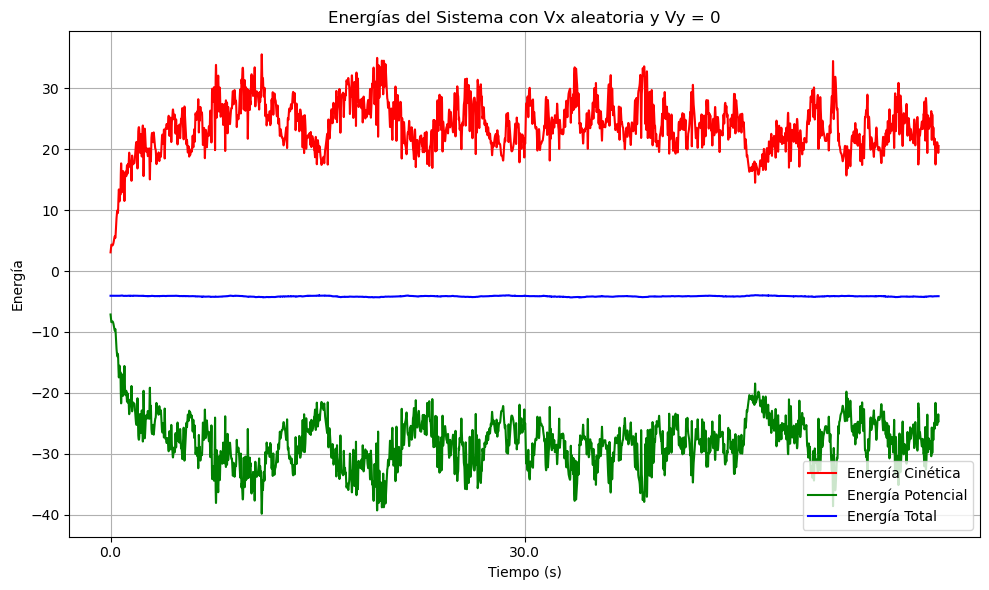

In [32]:
# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 30/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,30))
plt.title('Energías del Sistema con Vx aleatoria y Vy = 0')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


Y el histograma:

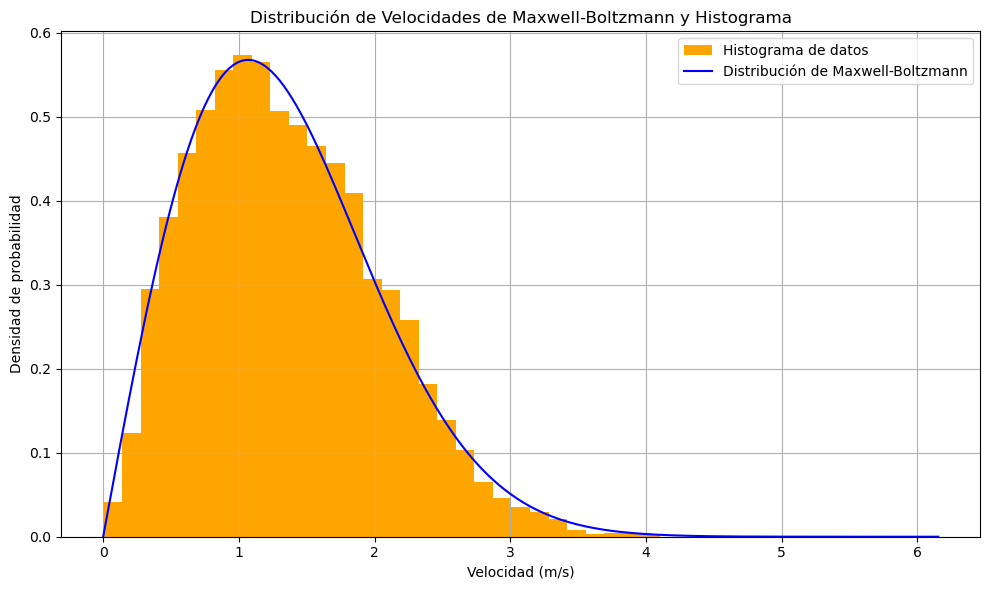

In [33]:
# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_2/velocidades.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title('Distribución de Velocidades de Maxwell-Boltzmann y Histograma')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()

### APARTADO 3

Ahora medimos la ecuación de estado con la presión y vemos la dependencia lineal entre la presión y la temperatura.

Para calcular la presión lo hacemos partiendo del momento lineal. Cada vez que una partícula colisiona con una pared, calculamos su momento lineal como masa por la velocidad y lo almacenamos, y después, la presión es ese momento lineal dividido por unidad de tiempo.

Los archivos utilizados en este apartado se encuentran el la carpeta 'apartado_3'. El programa para la simulación  es 'apartado_3.c', y nos genera 3 archivos: 
- 'datos_simulacion.txt' donde se guardan el número de partículas, la longitud de la caja, el paso, la temperatura del sistema y el tiempo de simulación, en ese orden.
- 'posiciones.txt' que contiene las posiciones de cada partícula tras cada paso.
- 'momentos.txt' que almacena los valores de la presión del sistema para cada iteración.


Hacemos el plot del ajuste de la presión y la temperatura

Pendiente: 0.0006437863293384766
Intercepto: -6.462533954926242e-05
Coeficiente de correlación de Pearson (r): 0.9994518222437173


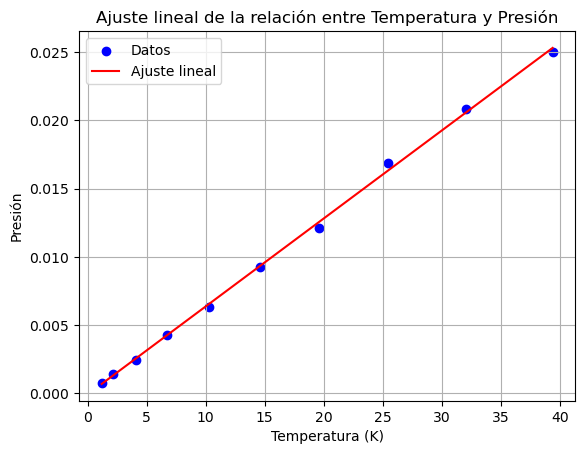

In [35]:
from scipy.stats import linregress

nombre_archivo = 'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_3/momentos.txt'

# Leer el archivo y cargar las columnas
datos = np.loadtxt(nombre_archivo, skiprows=1)  # Cambia el delimitador si es necesario
x = datos[:, 1]  # Primera columna
y = datos[:, 2]  # Segunda columna

# Realizar el ajuste lineal
pendiente, intercepto, r_value, p_value, std_err = linregress(x, y)

    # Mostrar resultados
print(f"Pendiente: {pendiente}")
print(f"Intercepto: {intercepto}")
print(f"Coeficiente de correlación de Pearson (r): {r_value}")

    # Graficar los datos y la línea ajustada
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, pendiente * x + intercepto, color='red', label='Ajuste lineal')
plt.xlabel('Temperatura (K)')
plt.ylabel('Presión')
plt.title("Ajuste lineal de la relación entre Temperatura y Presión")
plt.legend()
plt.grid()
plt.show()




### APARTADO 4. Transición de fase sólido-líquido.

Ahora, simularemos 16 partículas en una caja de 4 x 4 comenzando con las partículas fijas en una cuadrícula, y estudiaremos lo mismo que en el apartado 1: las energías y el histograma de la velocidad.

Los archivos utilizados en este apartado se encuentran el la carpeta 'apartado_4'. El programa para la simulación  es 'apartado_4.c', y nos genera 5 archivos: 
- 'datos_simulacion.txt' donde se guardan el número de partículas, la longitud de la caja, el paso, la temperatura del sistema y el tiempo de simulación, en ese orden.
- 'posiciones.txt' que contiene las posiciones de cada partícula tras cada paso.
- 'desplazamiento.txt' que contiene el desplazamiento de cada partícula con su posición inicial para cada iteración. (no se usa)
- 'energía.txt' que almacena los valores de energía potencial, cinética y total.
- 'velocidades.txt' que almacena las velocidades de cada partícula para realizar el histograma



Durante la simulación, podemos observar como, tras un cierto tiempo, las particulas se amontonan en forma de triangulos:

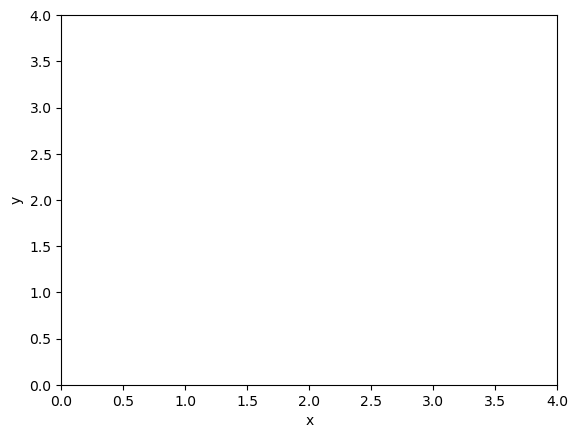

In [36]:

data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_4/datos_simulacion.txt')
N, L, h, T = int(data[0]), data[1], data[2], data[3]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_4/posiciones.txt"   # nombre de tu fichero              
interval_ms = 2                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_4/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=True)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')



Ahora vemos las energías

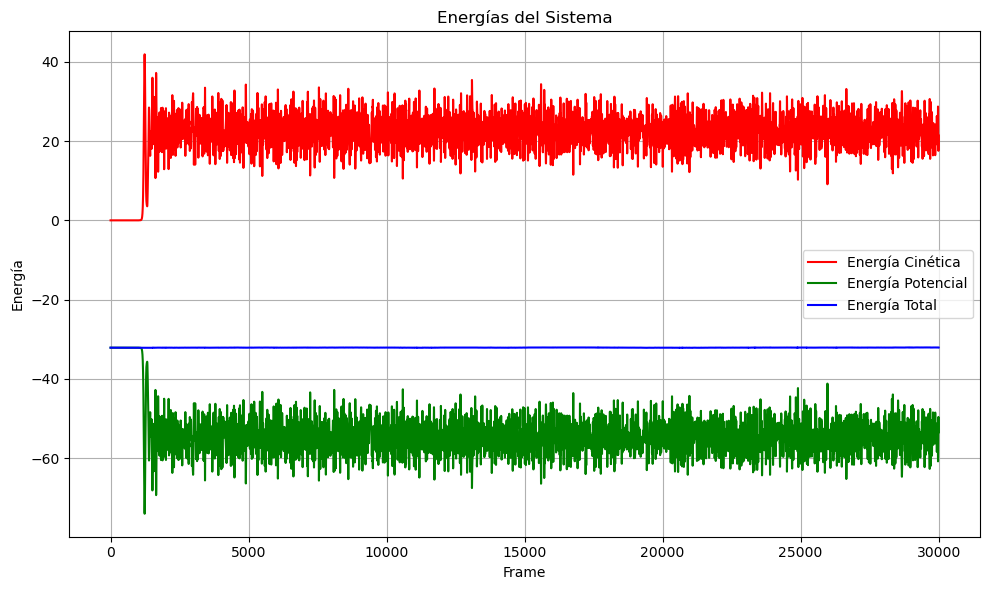

In [37]:

# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_4/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

plt.title('Energías del Sistema')
plt.xlabel('Frame')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


Y ahora vemos el histograma

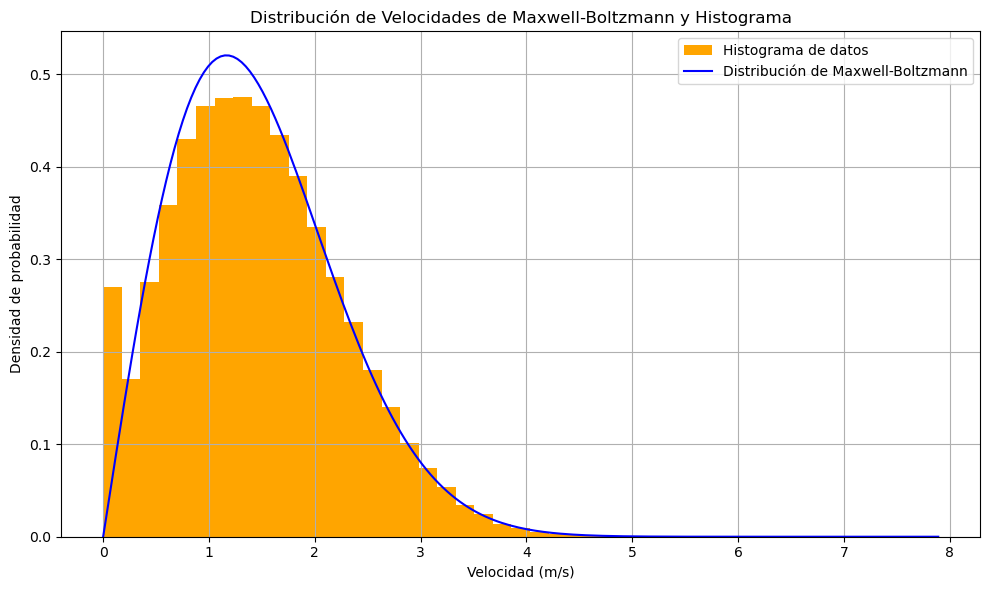

In [38]:

# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_4/velocidades.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title('Distribución de Velocidades de Maxwell-Boltzmann y Histograma')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()







### APARTADO 5

Demostrar que al disponer las partículas de otra forma se obtiene al cabo de cierto tiempo la estructura triangular. 

Para demostrar esto partiremos de dos estructuras diferentes: primero una donde están dispuestas de forma pseudoaleatoria, en una malla pero pueden variar la posición cierta cantidad de forma aleatoria y en una disposición hexagonal.       

Haremos los dos códigos con la simulación (los programas se encuentran el la carpeta 'apartado_5', el programa con las posiciones aleatorias se llama 'apartado_5' y el programa con la disposición hexagonal se llama 'apartado_5hex')

Comenzamos con la disposición aleatoria:


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/datos_simulacionhex.txt')
N, L, h, T = int(data[0]), data[1], data[2], data[3]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/posicioneshex.txt"   # nombre de tu fichero              
interval_ms = 2                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/simulacionhex.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=False)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')


ValueError: could not convert string '-nan(ind)' to float64 at row 0, column 4.

Ahora hacemos la disposición hexagonal

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/datos_simulacionhex.txt')
N, L, h, T = int(data[0]), data[1], data[2], data[3]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/posicioneshex.txt"   # nombre de tu fichero              
interval_ms = 2                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_5/simulacionhex.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=True)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')



ValueError: could not convert string '-nan(ind)' to float64 at row 0, column 4.

### APARTADO 6 

Ahora volvemos a disponer la estructura de cuadrícula del apartado 4, pero ahora vamos aumentando la velocidad por un factor 1.5 para los tiempos t = 20, 30, 35 y 45.

Con estos incrementos de velocidad, veremos como se pierde la estructura de sólido y estudiaremos las fluctuaciones de la posición inicial $\langle (r(t) - r(t=0))^2 \rangle $

Los archivos utilizados en este apartado se encuentran el la carpeta 'apartado_6'. El programa para la simulación  es 'apartado_6.c', y nos genera 5 archivos: 
- 'datos_simulacion.txt' donde se guardan el número de partículas, la longitud de la caja, el paso, la temperatura del sistema y el tiempo de simulación, en ese orden.
- 'posiciones.txt' que contiene las posiciones de cada partícula tras cada paso.
- 'desplazamiento.txt' que contiene el desplazamiento de cada partícula con su posición inicial para cada iteración.
- 'energía.txt' que almacena los valores de energía potencial, cinética y total.
- 'velocidades.txt' que almacena las velocidades de cada partícula para realizar el histograma

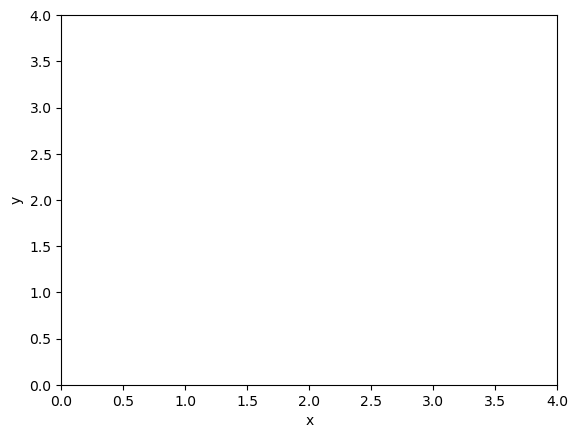

In [41]:

data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_6/datos_simulacion.txt')
N, L, h, T = int(data[0]), data[1], data[2], data[3]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_6/posiciones.txt"   # nombre de tu fichero              
interval_ms = 2                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_6/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=True)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')





Ahora graficamos la energía. Deberíamos ver como aumenta como una escalera a medida que aumentamos manualmente la velocidad, ya que aumenta la energía cinética.

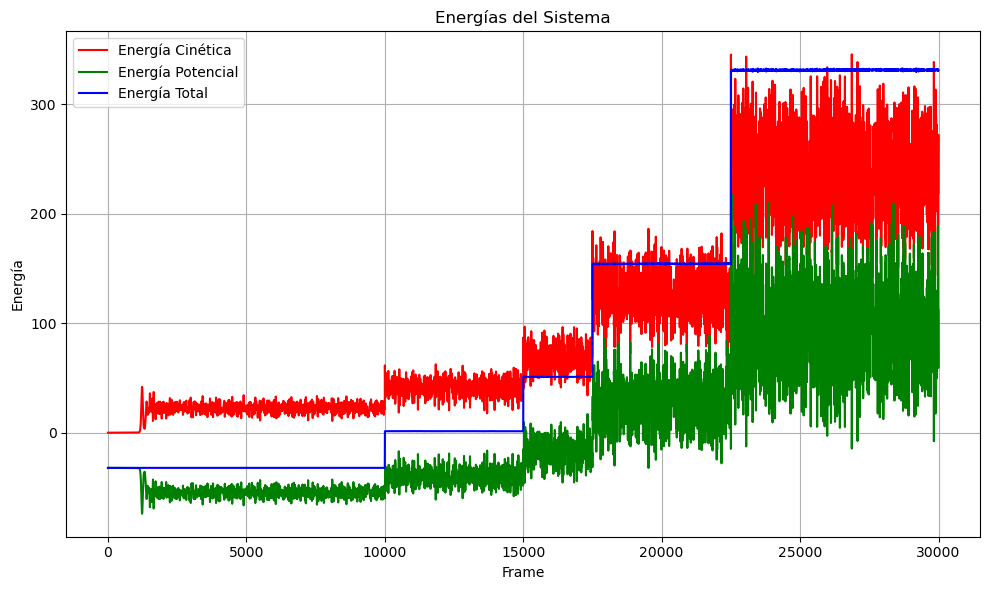

In [42]:

# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_6/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

plt.title('Energías del Sistema')
plt.xlabel('Frame')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()

Ahora vemos el desplazamiento relativo de las partículas

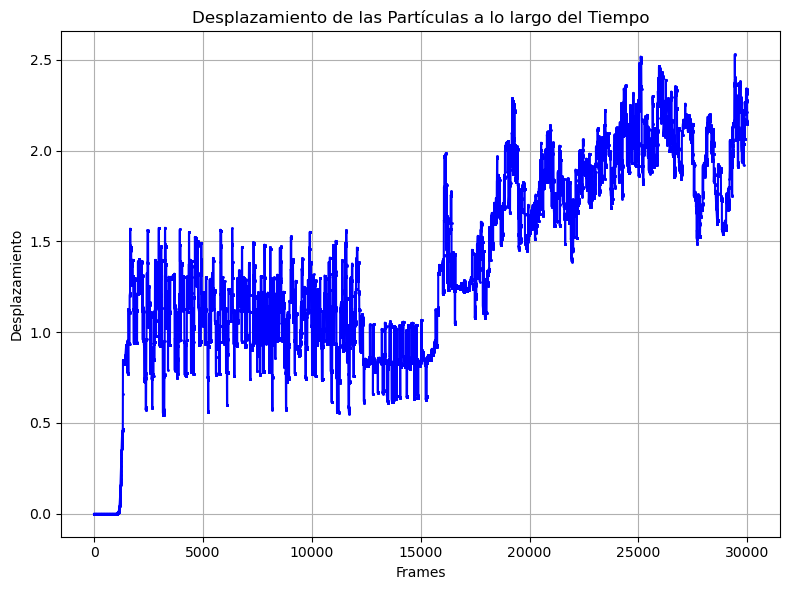

In [45]:
# Representamos el módulo del desplazamiento de las partículas

desplazamiento = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_6/desplazamiento.txt')
steps = np.arange(len(desplazamiento))
# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(steps, desplazamiento, marker='o', linestyle='-', color='b', label='Desplazamiento', markersize=1)
plt.grid(True)
plt.xlabel('Frames')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de las Partículas a lo largo del Tiempo')
plt.tight_layout()
        
# Mostrar el gráfico
plt.show()

### APARTADO 7

Determinaremos la temperatura crítica incrementando la temperatura de nuevo, pero ahora en un factor de 1.5 cada 60 segundos de tiempo. Estudiaremos la fluctuación entre partículas con la ecuación $\langle (\Delta r_{i,j}(t))^2 \rangle $ = $\langle (r_i(t) - r_j(t))^2 \rangle $

La temperatura crítica será donde los átomos experimenten un alejamiento considerable y abrupto de sus posiciones.

Los archivos utilizados en este apartado se encuentran el la carpeta 'apartado_7'. El programa para la simulación  es 'apartado_7.c', y nos genera 5 archivos: 
- 'datos_simulacion.txt' donde se guardan el número de partículas, la longitud de la caja, el paso, la temperatura del sistema y el tiempo de simulación, en ese orden.
- 'posiciones.txt' que contiene las posiciones de cada partícula tras cada paso.
- 'desplazamiento.txt' que contiene el desplazamiento relativo entre una partícula cualquiera (hemos escogido la primera) y el resto de partículas.
- 'energía.txt' que almacena los valores de energía potencial, cinética y total.
- 'velocidades.txt' que almacena las velocidades de cada partícula para realizar el histograma





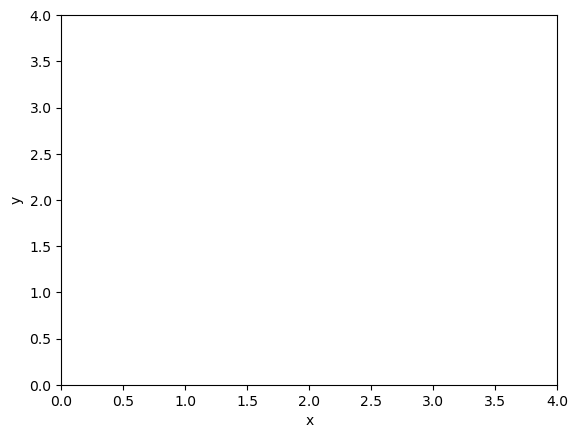

In [46]:

data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/datos_simulacion.txt')
N, L, h, T = int(data[0]), data[1], data[2], data[3]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/posiciones.txt"   # nombre de tu fichero              
interval_ms = 2                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=True)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')



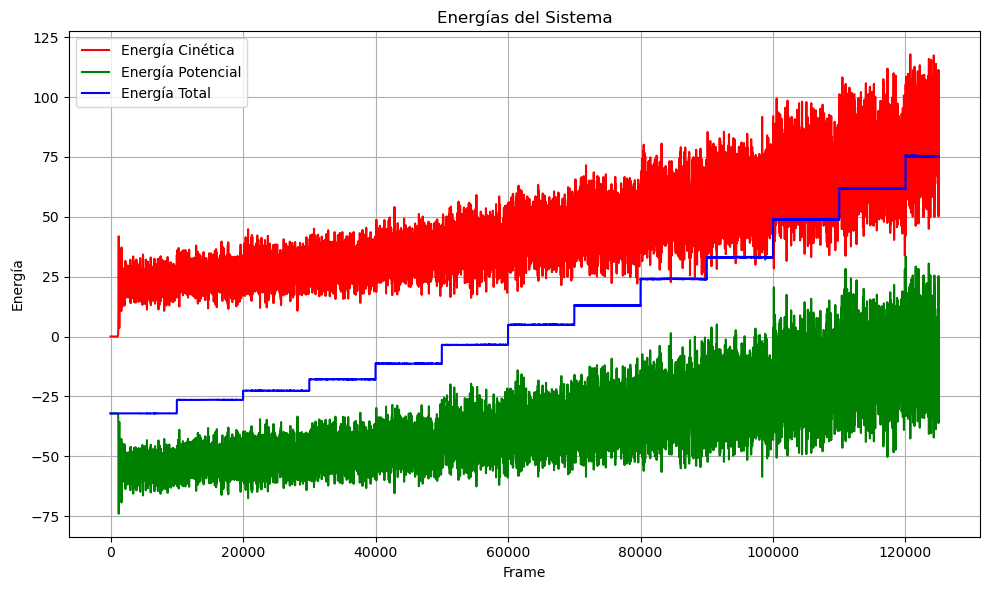

In [47]:
# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

plt.title('Energías del Sistema')
plt.xlabel('Frame')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()

In [52]:
#CAMBIA LA PARTICULA QUE FIJAS

from matplotlib.patches import Ellipse

particula=0

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

filename = 'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/desplazamiento.txt'

# Función para leer las fluctuaciones desde el archivo
def leer_fluctuaciones(filename):

    fluctuaciones = []
    with open(filename, 'r') as file:
        particulas_actuales = []  # Almacena las fluctuaciones de las partículas en un paso temporal
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = list(map(float, linea.split()))  # Convertir los valores a flotantes
                particulas_actuales.append(datos)
            else:  # Si encontramos un salto de línea, procesamos el paso temporal
                if particulas_actuales:
                    # Transponer para obtener la evolución temporal de cada partícula
                    if not fluctuaciones:
                        fluctuaciones = [[] for _ in range(len(particulas_actuales))]
                    for i, particula in enumerate(particulas_actuales):
                        fluctuaciones[i].extend(particula)
                    particulas_actuales = []  # Reiniciar para el siguiente paso temporal

        # Procesar el último paso si no está vacío
        if particulas_actuales:
            if not fluctuaciones:
                fluctuaciones = [[] for _ in range(len(particulas_actuales))]
            for i, particula in enumerate(particulas_actuales):
                fluctuaciones[i].extend(particula)

    return fluctuaciones

# Función para crear el video directamente
def crear_video(fluctuaciones, video_path, intervalo=500):

    writer = FFMpegWriter(fps=1000 // intervalo)
    fig, ax = plt.subplots(figsize=(8, 6))

    with writer.saving(fig, video_path, dpi=200):
        for particula_idx, fluctuacion in enumerate(fluctuaciones):
            pasos = range(1, len(fluctuacion) + 1)
            ax.clear()
            ax.plot(pasos, fluctuacion, color='blue', linewidth=0.8, label=f'Partícula {particula_idx + 1}')
            ax.set_xlabel('Paso temporal')
            ax.set_ylabel('Fluctuación')
            ax.set_title(f'Fluctuación de la Partícula {particula_idx + 1} con respecto a la partícula {particula}')
            ax.legend()
            ax.grid(True)
            
            writer.grab_frame()
            plt.savefig(f'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/PLOTS_INFORME/7.desplazamiento{particula_idx}.png', bbox_inches='tight', dpi=200)
    
    plt.close(fig)


if __name__ == "__main__":
    archivo = 'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/desplazamiento.txt'  # Nombre del archivo de fluctuaciones
    video_path = f"C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_7/fluctuaciones_{particula}.mp4"

    # Leer las fluctuaciones
    fluctuaciones = leer_fluctuaciones(archivo)
    

    # Crear el video directamente
    crear_video(fluctuaciones, video_path, intervalo=500)


from IPython.display import Video

# Mostrar el video en el notebook
Video(video_path, embed=True, width=740, height=360)

### OPTIMIZACIÓN

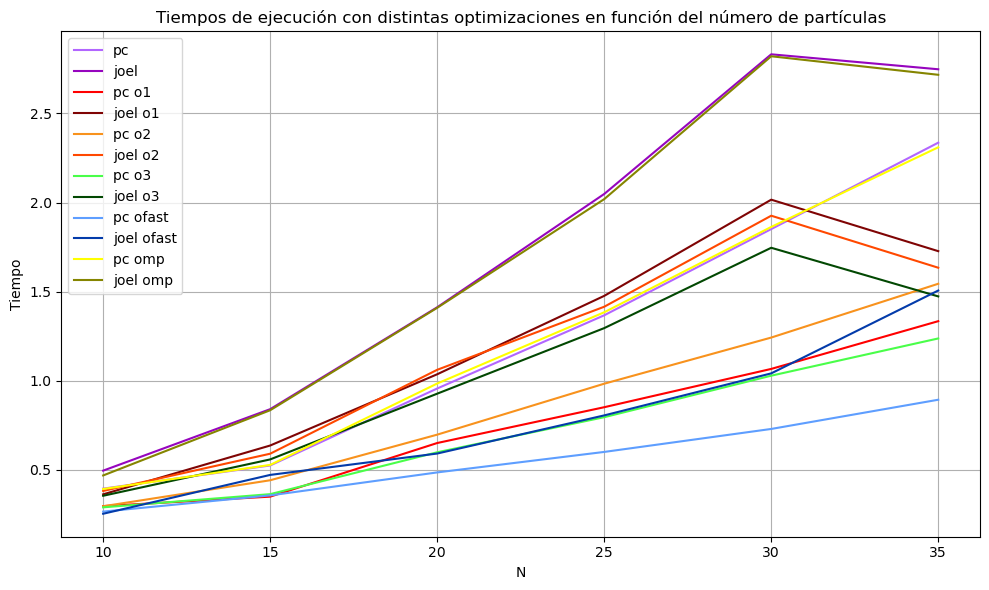

In [54]:
import numpy as np
import matplotlib.pyplot as plt


pc = [0.394,0.524,0.956,1.367,1.851,2.336]
pco1 = [0.296, 0.349, 0.650, 0.851, 1.066, 1.334]
pco2 = [0.295, 0.441, 0.697, 0.983, 1.242, 1.544]
pco3 = [0.289, 0.363, 0.598, 0.795, 1.028, 1.237]
pcofast = [0.265, 0.356, 0.485, 0.6, 0.729, 0.893]
pcomp = [0.392,0.527,0.984,1.384,1.863,2.310]
joel = [0.495, 0.840, 1.412, 2.048, 2.832, 2.748]
joelo1 = [0.362, 0.636, 1.036, 1.476, 2.016, 1.727]
joelo2 = [0.381, 0.590, 1.061, 1.415, 1.926, 1.634]
joelo3 = [0.354, 0.558, 0.927, 1.295, 1.746, 1.473]
joelofast = [0.253, 0.471, 0.591, 0.805, 1.041, 1.506]
joelomp = [0.468, 0.834, 1.409, 2.019, 2.821, 2.717]



# Crear vector
N = [10, 15, 20, 25, 30, 35]


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N, pc, label=f'pc', color="#B266FF")
plt.plot(N, joel, label=f'joel', color="#9605BE")
plt.plot(N, pco1, label=f'pc o1', color="#FF0000")
plt.plot(N, joelo1, label=f'joel o1', color="#7F0404")
plt.plot(N, pco2, label=f'pc o2', color="#F8921D")
plt.plot(N, joelo2, label=f'joel o2', color="#FF4800")
plt.plot(N, pco3, label=f'pc o3', color="#49FE49")
plt.plot(N, joelo3, label=f'joel o3', color="#024802")
plt.plot(N, pcofast, label=f'pc ofast', color="#5E9EFF")
plt.plot(N, joelofast, label=f'joel ofast', color="#033BAA")
plt.plot(N, pcomp, label=f'pc omp', color="#FFFF00")
plt.plot(N, joelomp, label=f'joel omp', color="#858500")





plt.xticks(N, labels=[10, 15, 20, 25, 30, 35])
plt.title(f'Tiempos de ejecución con distintas optimizaciones en función del número de partículas')
plt.xlabel('N')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


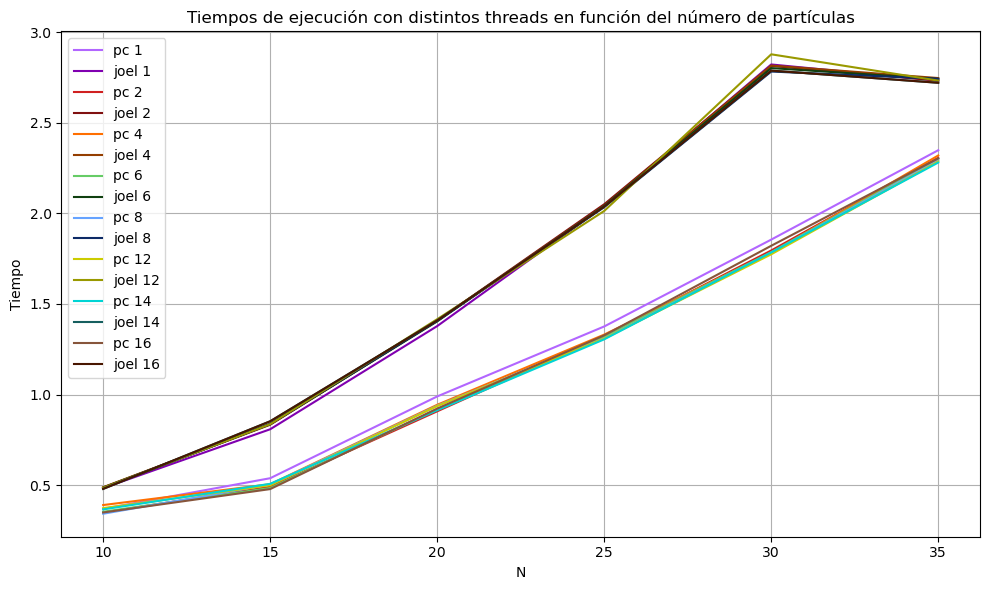

In [55]:
import numpy as np
import matplotlib.pyplot as plt


pc1 = [0.370, 0.539, 0.990, 1.376, 1.855, 2.348]
pc2 = [0.350, 0.492, 0.908, 1.322, 1.795, 2.306]
pc4 = [0.391, 0.506, 0.944, 1.331, 1.783, 2.319]
pc6 = [0.354, 0.485, 0.919, 1.320, 1.786, 2.300]
pc8 = [0.343, 0.504, 0.939, 1.310, 1.782, 2.292]
pc12 = [0.374, 0.5, 0.937, 1.309, 1.774, 2.286]
pc14 = [0.367, 0.508, 0.914, 1.305, 1.784, 2.280]
pc16 = [0.350, 0.479, 0.923, 1.327, 1.821, 2.303]

joel1 = [0.484, 0.809, 1.378, 2.040, 2.821, 2.732]
joel2 = [0.488, 0.834, 1.408, 2.050, 2.813, 2.732]
joel4 = [0.489, 0.838, 1.409, 2.042, 2.815, 2.746]
joel6 = [0.486, 0.837, 1.404, 2.040, 2.801, 2.741]
joel8 = [0.485, 0.838, 1.407, 2.034, 2.782, 2.742]
joel12 = [0.486, 0.837, 1.416, 2.013, 2.877, 2.732]
joel14 = [0.480, 0.853, 1.409, 2.037, 2.787, 2.720]
joel16 = [0.488, 0.809, 1.370, 2.035, 2.817, 2.697]



# Crear vector
N = [10, 15, 20, 25, 30, 35]


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N, pc1, label=f'pc 1', color='#B266FF')
plt.plot(N, joel1, label=f'joel 1', color='#8000B0')
plt.plot(N, pc2, label=f'pc 2', color='#D02020')
plt.plot(N, joel2, label=f'joel 2', color='#801010')
plt.plot(N, pc4, label=f'pc 4', color="#FF6F00")
plt.plot(N, joel4, label=f'joel 4', color="#943E00")
plt.plot(N, pc6, label=f'pc 6', color='#66CC66')
plt.plot(N, joel6, label=f'joel 6', color='#104010')
plt.plot(N, pc8, label=f'pc 8', color='#66A3FF')
plt.plot(N, joel8, label=f'joel 8', color='#0D2A66')
plt.plot(N, pc12, label=f'pc 12', color='#CCCC00')
plt.plot(N, joel12, label=f'joel 12', color='#999900')
plt.plot(N, pc14, label=f'pc 14', color="#00D4D4")
plt.plot(N, joel14, label=f'joel 14', color="#165F5F")
plt.plot(N, pc16, label=f'pc 16', color="#87553B")
plt.plot(N, joel14, label=f'joel 16', color="#481600")













plt.xticks(N, labels=[10, 15, 20, 25, 30, 35])
plt.title(f'Tiempos de ejecución con distintos threads en función del número de partículas')
plt.xlabel('N')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()

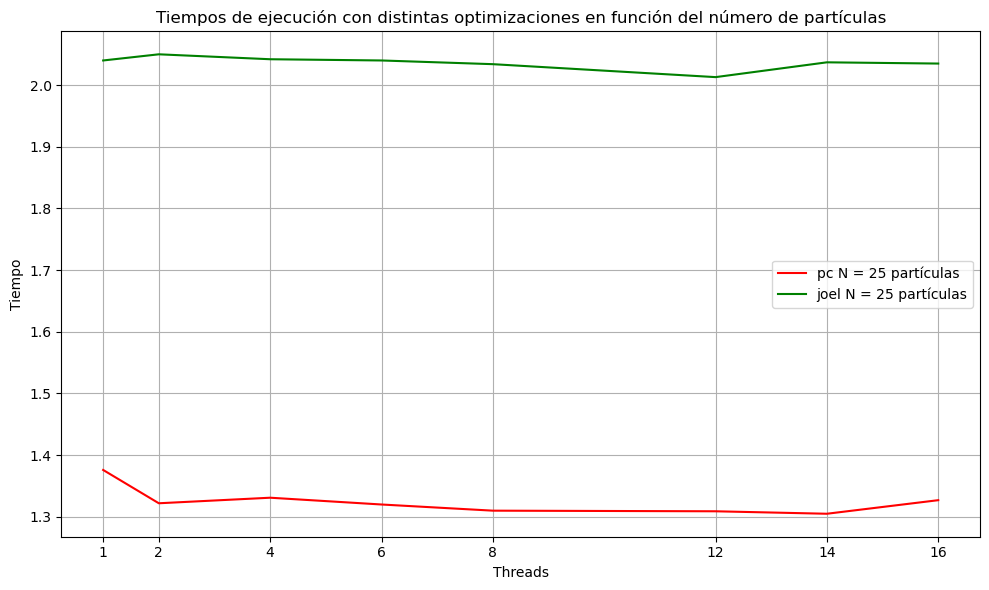

In [13]:
import numpy as np
import matplotlib.pyplot as plt




pc25 = [1.376, 1.322,  1.331,1.320, 1.310, 1.309, 1.305, 1.327]



joel25 = [ 2.040,  2.050,  2.042,  2.040, 2.034,2.013, 2.037,  2.035,]

# Crear vector
N = [1, 2, 4, 6, 8, 12, 14, 16]


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N, pc25, label='pc N = 25 partículas', color='red')
plt.plot(N, joel25, label='joel N = 25 partículas', color='green')






plt.xticks(N, labels=N)
plt.title(f'Tiempos de ejecución con distintas optimizaciones en función del número de partículas')
plt.xlabel('Threads')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()